In [1]:
#importing modules
import numpy as np
import pandas as pd
import scipy
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import collections
import statsmodels.stats.proportion
%matplotlib inline

In [2]:
data_xls = pd.read_excel('/Users/manueltanguma/Downloads/crimes.xls', index_col=3)
data_xls.to_csv('crimes.csv', encoding='utf-8')

In [3]:
#the target csv file
data = pd.read_csv('crimes.csv', encoding='latin-1')

In [4]:
data.head(10)

,Unnamed: 0,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Offenses Known to Law Enforcement,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Murder and\nnonnegligent\nmanslaughter,City,Population,Violent\ncrime,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,0,Adams Village,1861,0,NaN,0,0,0,12,2,10,0,0
5,0,Addison Town and Village,2577,3,NaN,0,0,3,24,3,20,1,0
6,0,Akron Village,2846,3,NaN,0,0,3,16,1,15,0,0
7,8,Albany,97956,791,NaN,30,227,526,4090,705,3243,142,NaN
8,0,Albion Village,6388,23,NaN,3,4,16,223,53,165,5,NaN
9,0,Alfred Village,4089,5,NaN,0,3,2,46,10,36,0,NaN


In [5]:
data = data.iloc[3:]

In [6]:
data.head(10)

,Unnamed: 0,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
3,Murder and\nnonnegligent\nmanslaughter,City,Population,Violent\ncrime,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,0,Adams Village,1861,0,NaN,0,0,0,12,2,10,0,0
5,0,Addison Town and Village,2577,3,NaN,0,0,3,24,3,20,1,0
6,0,Akron Village,2846,3,NaN,0,0,3,16,1,15,0,0
7,8,Albany,97956,791,NaN,30,227,526,4090,705,3243,142,NaN
8,0,Albion Village,6388,23,NaN,3,4,16,223,53,165,5,NaN
9,0,Alfred Village,4089,5,NaN,0,3,2,46,10,36,0,NaN
10,0,Allegany Village,1781,3,NaN,0,0,3,10,0,10,0,0
11,1,Amherst Town,118296,107,NaN,7,31,68,2118,204,1882,32,3
12,0,Amityville Village,9519,9,NaN,2,4,3,210,16,188,6,1


In [7]:
new_header = data.iloc[0] #grab the first row for the header
data = data[1:] #take the data less the header row
data.columns = new_header #set the header row as the df header

In [8]:
data.head(5)

3,Murder and nonnegligent manslaughter,City,Population,Violent crime,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
4,0,Adams Village,1861,0,NaN,0,0,0,12,2,10,0,0
5,0,Addison Town and Village,2577,3,NaN,0,0,3,24,3,20,1,0
6,0,Akron Village,2846,3,NaN,0,0,3,16,1,15,0,0
7,8,Albany,97956,791,NaN,30,227,526,4090,705,3243,142,NaN
8,0,Albion Village,6388,23,NaN,3,4,16,223,53,165,5,NaN


In [9]:
data = data.reset_index(drop=True)

In [10]:
data.head(5)

3,Murder and nonnegligent manslaughter,City,Population,Violent crime,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,0,Adams Village,1861,0,NaN,0,0,0,12,2,10,0,0
1,0,Addison Town and Village,2577,3,NaN,0,0,3,24,3,20,1,0
2,0,Akron Village,2846,3,NaN,0,0,3,16,1,15,0,0
3,8,Albany,97956,791,NaN,30,227,526,4090,705,3243,142,NaN
4,0,Albion Village,6388,23,NaN,3,4,16,223,53,165,5,NaN


In [11]:
cols = data.columns.tolist()

In [12]:
cols

['Murder and\nnonnegligent\nmanslaughter',
 'City',
 'Population',
 'Violent\ncrime',
 'Rape\n(revised\ndefinition)1',
 'Rape\n(legacy\ndefinition)2',
 'Robbery',
 'Aggravated\nassault',
 'Property\ncrime',
 'Burglary',
 'Larceny-\ntheft',
 'Motor\nvehicle\ntheft',
 'Arson3']

In [13]:
columnsTitles = ['City', 'Population', 'Murder and\nnonnegligent\nmanslaughter','Violent\ncrime', 'Rape\n(revised\ndefinition)1',
                'Rape\n(legacy\ndefinition)2', 'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
                'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3']

data = data.reindex(columns=columnsTitles)

In [14]:
data.head(5)

3,City,Population,Murder and nonnegligent manslaughter,Violent crime,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0
1,Addison Town and Village,2577,0,3,NaN,0,0,3,24,3,20,1,0
2,Akron Village,2846,0,3,NaN,0,0,3,16,1,15,0,0
3,Albany,97956,8,791,NaN,30,227,526,4090,705,3243,142,NaN
4,Albion Village,6388,0,23,NaN,3,4,16,223,53,165,5,NaN


In [15]:
data.tail(5)

3,City,Population,Murder and nonnegligent manslaughter,Violent crime,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
346,Yonkers,199134,6,1036,NaN,25,390,615,2368,470,1662,236,10
347,Yorktown Town,36643,0,15,NaN,0,2,13,334,45,287,2,NaN
348,1 The figures shown in this column for the off...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
349,2 The figures shown in this column for the off...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
350,3 The FBI does not publish arson data unless i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
data.tail(20)

3,City,Population,Murder and nonnegligent manslaughter,Violent crime,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
331,Watervliet,10245,1,26,NaN,3,11,11,242,58,163,21,NaN
332,Watkins Glen Village,1862,0,6,NaN,0,0,6,92,10,80,2,NaN
333,Waverly Village,4337,0,5,NaN,0,1,4,54,9,41,4,NaN
334,Webster Town and Village,43777,0,21,NaN,2,3,16,469,101,361,7,NaN
335,Weedsport Village,1797,0,0,NaN,0,0,0,25,5,20,0,0
336,Wellsville Village,4574,0,11,NaN,1,0,10,164,32,129,3,1
337,Westhampton Beach Village,1732,0,2,NaN,0,0,2,44,4,37,3,0
338,West Seneca Town,44821,1,35,NaN,1,9,24,896,166,710,20,0
339,Whitehall Village,2604,0,6,NaN,0,0,6,62,12,49,1,NaN
340,White Plains,57559,1,78,NaN,3,28,46,1232,77,1134,21,NaN


In [17]:
data.shape

(351, 13)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 13 columns):
City                                    351 non-null object
Population                              348 non-null object
Murder and
nonnegligent
manslaughter    348 non-null object
Violent
crime                           348 non-null object
Rape
(revised
definition)1              0 non-null object
Rape
(legacy
definition)2               348 non-null object
Robbery                                 348 non-null object
Aggravated
assault                      348 non-null object
Property
crime                          348 non-null object
Burglary                                348 non-null object
Larceny-
theft                          348 non-null object
Motor
vehicle
theft                     348 non-null object
Arson3                                  187 non-null object
dtypes: object(13)
memory usage: 35.7+ KB


In [19]:
data = data[:-3]

In [20]:
data.tail(10)

3,City,Population,Murder and nonnegligent manslaughter,Violent crime,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
338,West Seneca Town,44821,1,35,NaN,1,9,24,896,166,710,20,0
339,Whitehall Village,2604,0,6,NaN,0,0,6,62,12,49,1,NaN
340,White Plains,57559,1,78,NaN,3,28,46,1232,77,1134,21,NaN
341,Whitesboro Village,3733,0,4,NaN,0,0,4,36,14,21,1,0
342,Whitestown Town,9141,0,0,NaN,0,0,0,77,13,61,3,0
343,Woodbury Town,10685,0,3,NaN,0,2,1,541,9,529,3,NaN
344,Woodridge Village,829,0,7,NaN,0,0,7,17,8,9,0,0
345,Woodstock Town,5931,0,2,NaN,0,0,2,58,13,45,0,NaN
346,Yonkers,199134,6,1036,NaN,25,390,615,2368,470,1662,236,10
347,Yorktown Town,36643,0,15,NaN,0,2,13,334,45,287,2,NaN


In [21]:
#addressing column names to make them more readable
data.columns = [
    'city', 'population', 'murder', 'violent_crime',
    'rape_revised_definition_1', 'rape_revised_definition_2', 'robbery', 'aggravated_assault',
    'property_crime', 'burglary', 'larceny_theft', 'motorvehicle_theft', 'arson']

In [22]:
data.head(5)

,city,population,murder,violent_crime,rape_revised_definition_1,rape_revised_definition_2,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motorvehicle_theft,arson
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0
1,Addison Town and Village,2577,0,3,NaN,0,0,3,24,3,20,1,0
2,Akron Village,2846,0,3,NaN,0,0,3,16,1,15,0,0
3,Albany,97956,8,791,NaN,30,227,526,4090,705,3243,142,NaN
4,Albion Village,6388,0,23,NaN,3,4,16,223,53,165,5,NaN


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 13 columns):
city                         348 non-null object
population                   348 non-null object
murder                       348 non-null object
violent_crime                348 non-null object
rape_revised_definition_1    0 non-null object
rape_revised_definition_2    348 non-null object
robbery                      348 non-null object
aggravated_assault           348 non-null object
property_crime               348 non-null object
burglary                     348 non-null object
larceny_theft                348 non-null object
motorvehicle_theft           348 non-null object
arson                        187 non-null object
dtypes: object(13)
memory usage: 35.4+ KB


In [24]:
#rape_revised_definition_1 seems to be empty of data; therefore will delete the column from the dataframe
data = data.drop(['rape_revised_definition_1'], axis=1)

In [25]:
data.head(5)

,city,population,murder,violent_crime,rape_revised_definition_2,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motorvehicle_theft,arson
0,Adams Village,1861,0,0,0,0,0,12,2,10,0,0
1,Addison Town and Village,2577,0,3,0,0,3,24,3,20,1,0
2,Akron Village,2846,0,3,0,0,3,16,1,15,0,0
3,Albany,97956,8,791,30,227,526,4090,705,3243,142,NaN
4,Albion Village,6388,0,23,3,4,16,223,53,165,5,NaN


In [26]:
#re-addressing column names to make them more readable
data.columns = [
    'city', 'population', 'murder', 'violent_crime',
    'rape', 'robbery', 'aggravated_assault',
    'property_crime', 'burglary', 'larceny_theft', 'motorvehicle_theft', 'arson']

In [27]:
data.head(5)

,city,population,murder,violent_crime,rape,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motorvehicle_theft,arson
0,Adams Village,1861,0,0,0,0,0,12,2,10,0,0
1,Addison Town and Village,2577,0,3,0,0,3,24,3,20,1,0
2,Akron Village,2846,0,3,0,0,3,16,1,15,0,0
3,Albany,97956,8,791,30,227,526,4090,705,3243,142,NaN
4,Albion Village,6388,0,23,3,4,16,223,53,165,5,NaN


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
city                  348 non-null object
population            348 non-null object
murder                348 non-null object
violent_crime         348 non-null object
rape                  348 non-null object
robbery               348 non-null object
aggravated_assault    348 non-null object
property_crime        348 non-null object
burglary              348 non-null object
larceny_theft         348 non-null object
motorvehicle_theft    348 non-null object
arson                 187 non-null object
dtypes: object(12)
memory usage: 32.7+ KB


In [29]:
data.shape

(348, 12)

In [30]:
#when converted the excel file to csv was left with dtypes of "object", had to convert values to integer or float to
#carry out calculations
for i in range(0, len(data.columns)):
    data.iloc[:,i] = pd.to_numeric(data.iloc[:,i], errors='ignore')
    # errors='ignore' lets strings remain as 'non-null objects'


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
city                  348 non-null object
population            348 non-null int64
murder                348 non-null int64
violent_crime         348 non-null int64
rape                  348 non-null int64
robbery               348 non-null int64
aggravated_assault    348 non-null int64
property_crime        348 non-null int64
burglary              348 non-null int64
larceny_theft         348 non-null int64
motorvehicle_theft    348 non-null int64
arson                 187 non-null float64
dtypes: float64(1), int64(10), object(1)
memory usage: 32.7+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a13f2f0b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1f5cb7f0>]], dtype=object)

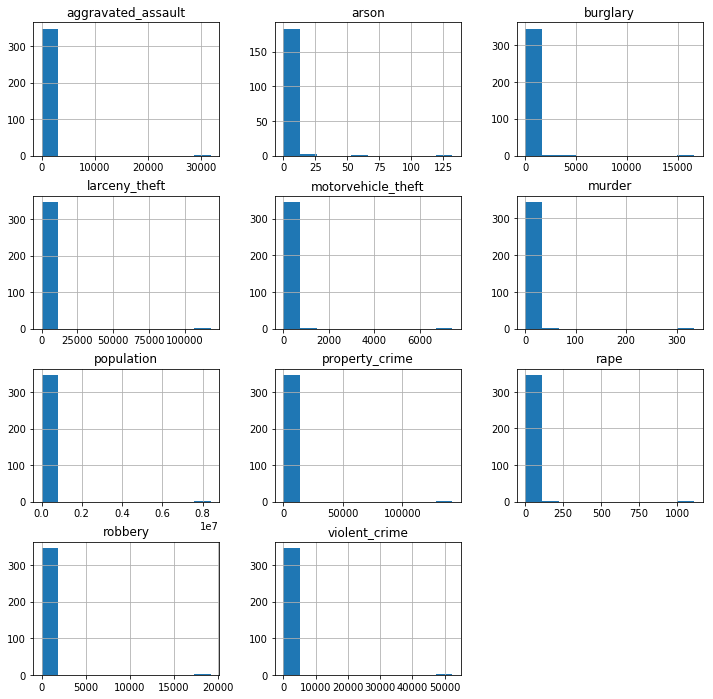

In [32]:
#quick look at some of the data
data.hist(figsize=(12, 12))

In [33]:
data.arson.value_counts()

0.0      133
1.0       23
2.0       11
4.0        5
3.0        5
5.0        2
10.0       2
57.0       1
132.0      1
22.0       1
15.0       1
6.0        1
8.0        1
Name: arson, dtype: int64

[Text(0,0,'population'),
 Text(0,0,'murder'),
 Text(0,0,'violent_crime'),
 Text(0,0,'rape'),
 Text(0,0,'robbery'),
 Text(0,0,'aggravated_assault'),
 Text(0,0,'property_crime'),
 Text(0,0,'burglary'),
 Text(0,0,'larceny_theft'),
 Text(0,0,'motorvehicle_theft'),
 Text(0,0,'arson')]

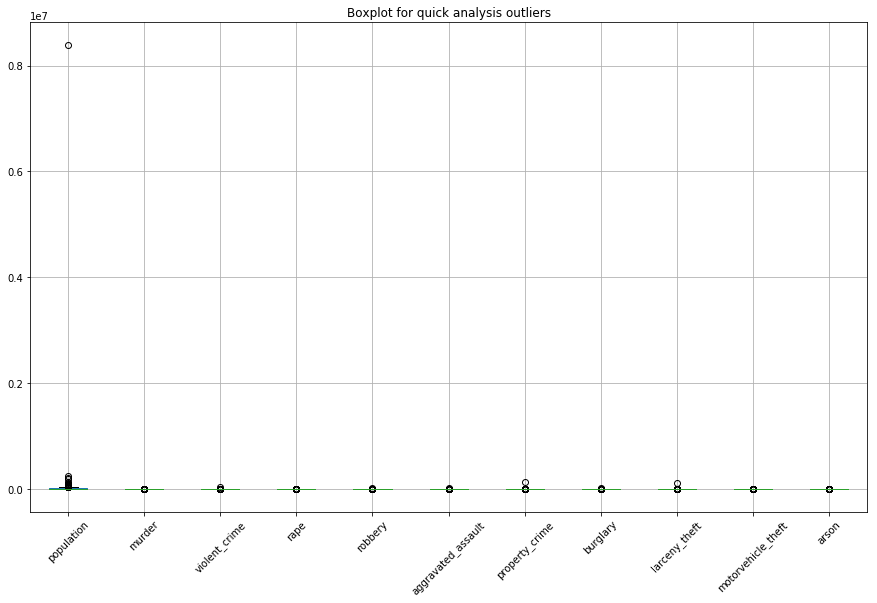

In [34]:
#Quick and dirty look at the data to check for outliers
plt.figure(figsize=(15,9))
ax = data.boxplot()
ax.set_title('Boxplot for quick analysis outliers')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

In [35]:
data.head(5)

,city,population,murder,violent_crime,rape,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motorvehicle_theft,arson
0,Adams Village,1861,0,0,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,2577,0,3,0,0,3,24,3,20,1,0.0
2,Akron Village,2846,0,3,0,0,3,16,1,15,0,0.0
3,Albany,97956,8,791,30,227,526,4090,705,3243,142,NaN
4,Albion Village,6388,0,23,3,4,16,223,53,165,5,NaN


In [36]:
#fill in NaN of arson with average of column
data['arson'].mean()

1.8716577540106951

In [37]:
data['arson'].fillna((data['arson'].mean()), inplace=True)

In [38]:
data.head(10)

,city,population,murder,violent_crime,rape,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motorvehicle_theft,arson
0,Adams Village,1861,0,0,0,0,0,12,2,10,0,0.000000
1,Addison Town and Village,2577,0,3,0,0,3,24,3,20,1,0.000000
2,Akron Village,2846,0,3,0,0,3,16,1,15,0,0.000000
3,Albany,97956,8,791,30,227,526,4090,705,3243,142,1.871658
4,Albion Village,6388,0,23,3,4,16,223,53,165,5,1.871658
5,Alfred Village,4089,0,5,0,3,2,46,10,36,0,1.871658
6,Allegany Village,1781,0,3,0,0,3,10,0,10,0,0.000000
7,Amherst Town,118296,1,107,7,31,68,2118,204,1882,32,3.000000
8,Amityville Village,9519,0,9,2,4,3,210,16,188,6,1.000000
9,Amsterdam,18182,0,30,0,12,18,405,99,291,15,0.000000


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
city                  348 non-null object
population            348 non-null int64
murder                348 non-null int64
violent_crime         348 non-null int64
rape                  348 non-null int64
robbery               348 non-null int64
aggravated_assault    348 non-null int64
property_crime        348 non-null int64
burglary              348 non-null int64
larceny_theft         348 non-null int64
motorvehicle_theft    348 non-null int64
arson                 348 non-null float64
dtypes: float64(1), int64(10), object(1)
memory usage: 32.7+ KB


In [40]:
data_no_city_pop = data.drop(['city', 'population'] , axis=1)
data_no_city_pop.head(5)

,murder,violent_crime,rape,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motorvehicle_theft,arson
0,0,0,0,0,0,12,2,10,0,0.000000
1,0,3,0,0,3,24,3,20,1,0.000000
2,0,3,0,0,3,16,1,15,0,0.000000
3,8,791,30,227,526,4090,705,3243,142,1.871658
4,0,23,3,4,16,223,53,165,5,1.871658


[Text(0,0,'murder'),
 Text(0,0,'violent_crime'),
 Text(0,0,'rape'),
 Text(0,0,'robbery'),
 Text(0,0,'aggravated_assault'),
 Text(0,0,'property_crime'),
 Text(0,0,'burglary'),
 Text(0,0,'larceny_theft'),
 Text(0,0,'motorvehicle_theft'),
 Text(0,0,'arson')]

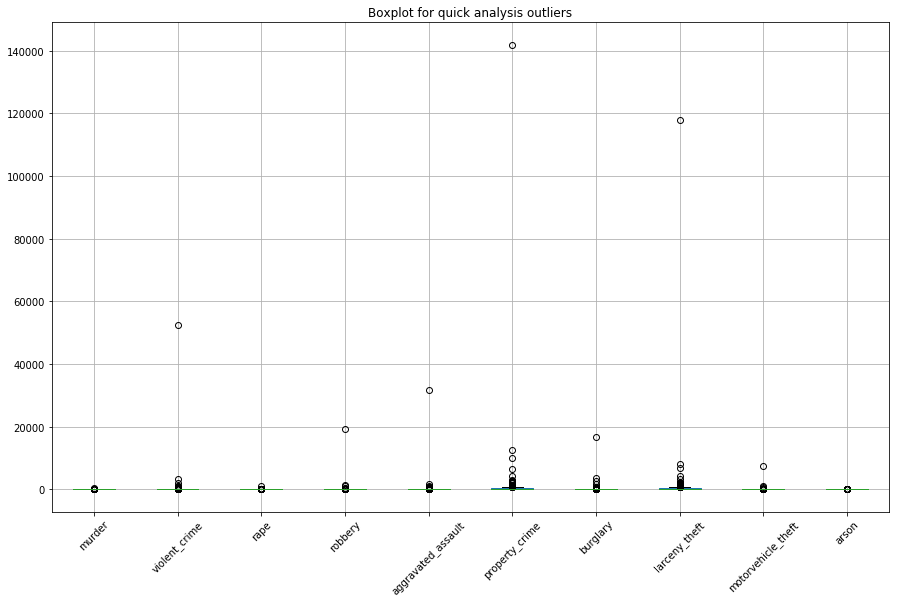

In [41]:
#Quick and dirty look at the data to check for outliers
plt.figure(figsize=(15,9))
ax = data_no_city_pop.boxplot()
ax.set_title('Boxplot for quick analysis outliers')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

In [42]:
data.shape

(348, 12)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
city                  348 non-null object
population            348 non-null int64
murder                348 non-null int64
violent_crime         348 non-null int64
rape                  348 non-null int64
robbery               348 non-null int64
aggravated_assault    348 non-null int64
property_crime        348 non-null int64
burglary              348 non-null int64
larceny_theft         348 non-null int64
motorvehicle_theft    348 non-null int64
arson                 348 non-null float64
dtypes: float64(1), int64(10), object(1)
memory usage: 32.7+ KB


In [44]:
data['arson'] = data['arson'].apply(np.int64)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
city                  348 non-null object
population            348 non-null int64
murder                348 non-null int64
violent_crime         348 non-null int64
rape                  348 non-null int64
robbery               348 non-null int64
aggravated_assault    348 non-null int64
property_crime        348 non-null int64
burglary              348 non-null int64
larceny_theft         348 non-null int64
motorvehicle_theft    348 non-null int64
arson                 348 non-null int64
dtypes: int64(11), object(1)
memory usage: 32.7+ KB


In [46]:
data.head(10)

,city,population,murder,violent_crime,rape,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motorvehicle_theft,arson
0,Adams Village,1861,0,0,0,0,0,12,2,10,0,0
1,Addison Town and Village,2577,0,3,0,0,3,24,3,20,1,0
2,Akron Village,2846,0,3,0,0,3,16,1,15,0,0
3,Albany,97956,8,791,30,227,526,4090,705,3243,142,1
4,Albion Village,6388,0,23,3,4,16,223,53,165,5,1
5,Alfred Village,4089,0,5,0,3,2,46,10,36,0,1
6,Allegany Village,1781,0,3,0,0,3,10,0,10,0,0
7,Amherst Town,118296,1,107,7,31,68,2118,204,1882,32,3
8,Amityville Village,9519,0,9,2,4,3,210,16,188,6,1
9,Amsterdam,18182,0,30,0,12,18,405,99,291,15,0


In [47]:
data['population_squared'] = data['population']**2

In [48]:
data.head(5)

,city,population,murder,violent_crime,rape,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motorvehicle_theft,arson,population_squared
0,Adams Village,1861,0,0,0,0,0,12,2,10,0,0,3463321
1,Addison Town and Village,2577,0,3,0,0,3,24,3,20,1,0,6640929
2,Akron Village,2846,0,3,0,0,3,16,1,15,0,0,8099716
3,Albany,97956,8,791,30,227,526,4090,705,3243,142,1,9595377936
4,Albion Village,6388,0,23,3,4,16,223,53,165,5,1,40806544


In [49]:
data['propertycrime_noalpha'] = data['population']+data['population_squared']+data['murder']+data['robbery']

In [50]:
data.head(5)

,city,population,murder,violent_crime,rape,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motorvehicle_theft,arson,population_squared,propertycrime_noalpha
0,Adams Village,1861,0,0,0,0,0,12,2,10,0,0,3463321,3465182
1,Addison Town and Village,2577,0,3,0,0,3,24,3,20,1,0,6640929,6643506
2,Akron Village,2846,0,3,0,0,3,16,1,15,0,0,8099716,8102562
3,Albany,97956,8,791,30,227,526,4090,705,3243,142,1,9595377936,9595476127
4,Albion Village,6388,0,23,3,4,16,223,53,165,5,1,40806544,40812936


In [51]:
#pd.get_dummies(data, columns = ['robbery', 'murder_and_manslaughter'])

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 14 columns):
city                     348 non-null object
population               348 non-null int64
murder                   348 non-null int64
violent_crime            348 non-null int64
rape                     348 non-null int64
robbery                  348 non-null int64
aggravated_assault       348 non-null int64
property_crime           348 non-null int64
burglary                 348 non-null int64
larceny_theft            348 non-null int64
motorvehicle_theft       348 non-null int64
arson                    348 non-null int64
population_squared       348 non-null int64
propertycrime_noalpha    348 non-null int64
dtypes: int64(13), object(1)
memory usage: 38.1+ KB


In [53]:
data.isnull().sum()

city                     0
population               0
murder                   0
violent_crime            0
rape                     0
robbery                  0
aggravated_assault       0
property_crime           0
burglary                 0
larceny_theft            0
motorvehicle_theft       0
arson                    0
population_squared       0
propertycrime_noalpha    0
dtype: int64

In [54]:
def func(x):
    if x == 0:
        return int('0')
    elif x > 0:
        return int('1')

data['robbery_cat'] = data['robbery'].apply(func)

In [55]:
data['murder_cat'] = data['murder'].apply(func)

In [56]:
data.head(5)

,city,population,murder,violent_crime,rape,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motorvehicle_theft,arson,population_squared,propertycrime_noalpha,robbery_cat,murder_cat
0,Adams Village,1861,0,0,0,0,0,12,2,10,0,0,3463321,3465182,0,0
1,Addison Town and Village,2577,0,3,0,0,3,24,3,20,1,0,6640929,6643506,0,0
2,Akron Village,2846,0,3,0,0,3,16,1,15,0,0,8099716,8102562,0,0
3,Albany,97956,8,791,30,227,526,4090,705,3243,142,1,9595377936,9595476127,1,1
4,Albion Village,6388,0,23,3,4,16,223,53,165,5,1,40806544,40812936,1,0


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 16 columns):
city                     348 non-null object
population               348 non-null int64
murder                   348 non-null int64
violent_crime            348 non-null int64
rape                     348 non-null int64
robbery                  348 non-null int64
aggravated_assault       348 non-null int64
property_crime           348 non-null int64
burglary                 348 non-null int64
larceny_theft            348 non-null int64
motorvehicle_theft       348 non-null int64
arson                    348 non-null int64
population_squared       348 non-null int64
propertycrime_noalpha    348 non-null int64
robbery_cat              348 non-null int64
murder_cat               348 non-null int64
dtypes: int64(15), object(1)
memory usage: 43.6+ KB
